In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

## Loading machine learning model

In [2]:
# with open('svc_model_linear_MinClass.pkl', 'rb') as f:
#         svc_model=load(f)
# with open('scaler_MinClass.pkl', 'rb') as f:
#         scaler=load(f)

In [3]:
# def classify_phases(filename, sheet_name, return_end_members=False):
#     Excel_In=pt.import_excel(filename, sheet_name)
#     Oxides=Excel_In['my_oxides']
#     with open('svc_model_linear_MinClass.pkl', 'rb') as f:
#         svc_model=load(f)
#     with open('scaler_MinClass.pkl', 'rb') as f:
#         scaler=load(f)  
        
#     # Dropping things which are often missing
#     Oxides_dropoxides=Oxides.drop(columns=['Cr2O3', 'K2O', 'P2O5'])
#     X_in=Oxides_dropoxides.values
    
#     ## This does the machine learning classification
#     X_in_scaled= scaler.transform(X_in)
#     svc_predictions=svc_model.predict(X_in_scaled) 
#     Oxides_out=Oxides.copy()
#     Oxides_out['Sum_Oxides']=Oxides.sum(axis=1)
#     Oxides_out['Phase_Min_Group_ML']=svc_predictions
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(0, "Amp")    
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(1, "Px")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(2, "Fspar")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(3, "Ol")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(4, "Sp")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(5, "Ox")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(6, "Ap")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(7, "Bt")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(8, "Qz")    
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(9, "Gt")

    
#     Oxides_out.loc[Oxides_out['Sum_Oxides']<90, 'Phase_Min_Group_ML'] = "Not Classified - Total<90"    
#     Oxides_out.loc[Oxides_out['Sum_Oxides']>110, 'Phase_Min_Group_ML'] = "Not Classified - Total>110"
#     Oxides_out['Phase_Mineral']=Oxides_out['Phase_Min_Group_ML']
    
#     #This does manual classification for feldsdpars.
#     Fspar=Oxides_out['Phase_Min_Group_ML']=="Fspar" # This checks we are only doing it for felspar
#     Oxides_Fspar=Oxides_out.add_suffix('_Plag')
#     Fspar_components=pt.calculate_cat_fractions_plagioclase(plag_comps=Oxides_Fspar)
#     Fspar_An=Fspar_components['An_Plag']
#     Fspar_Ab=Fspar_components['Ab_Plag']
#     Fspar_Or=Fspar_components['Or_Plag']  
#     if return_end_members==True:
#         Oxides_out['Ab']=Fspar_Ab
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Ab']="N/A"
#         Oxides_out['An']=Fspar_An
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'An']="N/A"
#         Oxides_out['Or']=Fspar_Or
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Or']="N/A"
        
#     Oxides_out.loc[( (Fspar) & (Fspar_An>0.1) & (Fspar_Or<0.1) ), 'Phase_Mineral'] = "Plag"    
#     Oxides_out.loc[( (Fspar) & (Fspar_Or>0.1) & (Fspar_An<0.1)), 'Phase_Mineral'] = "Kspar"    
#     Oxides_out.loc[(Fspar & (Fspar_An<0.1) &  (Fspar_Or<0.1)), 'Phase_Mineral'] = "Albite"      
    
#     Oxides_out['Fspar_Class']=Oxides_out['Phase_Min_Group_ML']

#     Oxides_out.loc[( (Fspar) & (Fspar_An<0.1) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Albite"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_Or.between(0.1, 0.37) ) &  (Fspar_An<0.2)), 'Fspar_Class'] = "Anorthoclase"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_Or>0.37) &  (Fspar_An<0.2) ), 'Fspar_Class'] = "Sanidine"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.1, 0.3)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Oligoclase"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.3, 0.5)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Andesine"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.5, 0.7)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Bytownite"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An>0.9) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Anorthite"                        
#     Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Fspar_Class']="N/A"
    
#     # This does Manual Classification for Pyroxenes
#     Oxides_Pyroxenes=Oxides_out.add_suffix('_Opx')
#     Px=Oxides_out['Phase_Min_Group_ML']=="Px"

#     Px_components=pt.calculate_orthopyroxene_components(opx_comps=Oxides_Pyroxenes)
#     Px_CaMgFe=Px_components['Ca_CaMgFe']
#     Oxides_out.loc[( (Px) & (Px_CaMgFe<0.05) ), 'Phase_Mineral'] = "Opx"     
#     Oxides_out.loc[( (Px) & (Px_CaMgFe.between(0.05, 0.2)) ), 'Phase_Mineral'] = "Pig"     
#     Oxides_out.loc[( (Px) & (Px_CaMgFe>0.2) ), 'Phase_Mineral'] = "Cpx" 
#     if return_end_members==True:
#         Oxides_out['Ca/CaMgFe Px']=Px_CaMgFe
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Px", 'Ca/CaMgFe']="N/A"    

#     # This does manual classification for amphiboles, based on Leake (1997)
    
    
#     return Oxides_out

## Amphibole GEOROC download - 16th August

In [4]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    GEOROC_Amp_in=pt.import_excel('GEOROC_Test_Amphibole.xlsx', sheet_name="AMPHIBOLES_reform")
    GEOROC_Amp_input=GEOROC_Amp_in['my_input']
    GEOROC_Amp_PreFilt=GEOROC_Amp_in['my_oxides']

In [5]:
GEOROC_Amp_input['TECTONIC SETTING'].unique()

array(['OCEAN ISLAND', 'INTRAPLATE VOLCANICS', 'RIFT VOLCANICS',
       'SEAMOUNT', 'CONVERGENT MARGIN', 'CONTINENTAL FLOOD BASALT', nan,
       'OCEANIC PLATEAU', 'SUBMARINE RIDGE', 'OCEAN-BASIN FLOOD BASALT',
       'ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)',
       'COMPLEX VOLCANIC SETTINGS'], dtype=object)

In [6]:
GEOROC_Amp_copy=GEOROC_Amp_PreFilt.copy()
GEOROC_Amp_copy['Sum_Oxides']=GEOROC_Amp_PreFilt.sum(axis=1)
GEOROC_Amp_copy['Sum_Oxides']
GEOROC_Amp=GEOROC_Amp_PreFilt.loc[(GEOROC_Amp_copy['Sum_Oxides']>70) & 
                                  (GEOROC_Amp_input['TECTONIC SETTING']!= "ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)")
                                 & (GEOROC_Amp_input['TECTONIC SETTING']!= "nan")]
GEOROC_Amp.to_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')

In [7]:
print('Initial length')
print(len(GEOROC_Amp_PreFilt))
print('Filt length')
print(len(GEOROC_Amp))


Initial length
48528
Filt length
40041


In [8]:
Amp=classify_phases('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered', return_end_members=True)


,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe Px,Ca/CaMgFe
0,41.4,2.86,14.80,12.13,0.16,13.79,10.90,3.05,0.81,0.00,0.08,99.98,Amp,Amp,N/A,N/A,N/A,N/A,0.275570,N/A
1,45.7,0.65,8.71,3.79,0.05,19.70,12.50,3.54,0.57,1.57,0.00,96.78,Amp,Amp,N/A,N/A,N/A,N/A,0.291595,N/A
2,43.0,3.17,12.40,5.22,0.08,16.60,11.80,3.13,0.87,1.70,0.00,97.97,Amp,Amp,N/A,N/A,N/A,N/A,0.302792,N/A
3,42.0,4.88,11.60,5.45,0.05,15.80,12.00,3.12,0.87,1.68,0.00,97.45,Amp,Amp,N/A,N/A,N/A,N/A,0.313831,N/A
4,36.6,0.02,22.80,6.25,0.04,21.40,0.54,4.92,1.67,0.01,0.00,94.25,Amp,Amp,N/A,N/A,N/A,N/A,0.015344,N/A


In [9]:
Amp_not_Classified=Amp.loc[Amp['Phase_Min_Group_ML'] == "Not Classified - Total<90"]
Amp_not_Classified.head()

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe Px,Ca/CaMgFe
29,34.40,3.71,14.30,0.00,0.17,9.23,12.46,3.09,1.60,0.0,0.84,79.80,Not Classified - Total<90,Not Classified - Total<90,N/A,N/A,N/A,N/A,0.492449,N/A
118,34.02,0.61,2.98,34.02,1.22,0.18,12.76,0.79,0.06,0.0,0.00,86.64,Not Classified - Total<90,Not Classified - Total<90,N/A,N/A,N/A,N/A,0.322518,N/A
365,48.20,1.40,5.70,0.00,0.00,9.90,10.60,1.20,0.70,0.0,0.00,77.70,Not Classified - Total<90,Not Classified - Total<90,N/A,N/A,N/A,N/A,0.434884,N/A
593,37.52,0.46,3.13,32.60,0.00,5.04,0.65,0.47,2.70,0.0,0.00,82.57,Not Classified - Total<90,Not Classified - Total<90,N/A,N/A,N/A,N/A,0.019633,N/A
710,41.80,2.38,11.57,0.00,0.18,14.69,11.41,2.37,0.22,0.0,0.00,84.62,Not Classified - Total<90,Not Classified - Total<90,N/A,N/A,N/A,N/A,0.358254,N/A


In [10]:
Amp_Classified=Amp.loc[Amp['Phase_Min_Group_ML'] != "Not Classified - Total<90"]

In [11]:
sum(Amp_Classified['Phase_Min_Group_ML']!="Amp")

8195

In [12]:
Amp_Classifed_Right=Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML']=="Amp"]
Amp_Classifed_Right

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe Px,Ca/CaMgFe
0,41.400,2.860,14.800,12.130,0.160,13.790,10.900,3.050,0.810,0.00,0.080,99.980,Amp,Amp,N/A,N/A,N/A,N/A,0.275570,N/A
1,45.700,0.650,8.710,3.790,0.050,19.700,12.500,3.540,0.570,1.57,0.000,96.780,Amp,Amp,N/A,N/A,N/A,N/A,0.291595,N/A
2,43.000,3.170,12.400,5.220,0.080,16.600,11.800,3.130,0.870,1.70,0.000,97.970,Amp,Amp,N/A,N/A,N/A,N/A,0.302792,N/A
3,42.000,4.880,11.600,5.450,0.050,15.800,12.000,3.120,0.870,1.68,0.000,97.450,Amp,Amp,N/A,N/A,N/A,N/A,0.313831,N/A
4,36.600,0.020,22.800,6.250,0.040,21.400,0.540,4.920,1.670,0.01,0.000,94.250,Amp,Amp,N/A,N/A,N/A,N/A,0.015344,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,47.120,1.450,6.620,14.482,0.380,14.070,11.830,1.590,0.610,0.00,0.000,98.152,Amp,Amp,N/A,N/A,N/A,N/A,0.276986,N/A
39990,47.170,1.500,6.470,14.290,0.400,14.070,11.730,1.600,0.670,0.00,0.000,97.900,Amp,Amp,N/A,N/A,N/A,N/A,0.276261,N/A
39994,47.900,1.580,6.120,13.808,0.320,14.320,11.680,1.580,0.560,0.00,0.000,97.868,Amp,Amp,N/A,N/A,N/A,N/A,0.275592,N/A
40022,44.700,1.348,8.710,17.681,0.396,10.967,11.944,1.039,0.933,0.00,0.000,97.718,Amp,Amp,N/A,N/A,N/A,N/A,0.291294,N/A


In [13]:
Amp_Classifed_Wrong=Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML']!="Amp"]
Amp_Classifed_Wrong

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe Px,Ca/CaMgFe
33,45.740,0.260,0.990,35.570,2.100,0.270,11.200,0.280,0.220,0.000,0.000,96.630,Px,Cpx,N/A,N/A,N/A,N/A,0.284707,NaN
47,49.790,0.320,0.900,17.740,0.880,12.910,11.610,1.650,0.170,0.000,0.000,95.970,Px,Cpx,N/A,N/A,N/A,N/A,0.267396,NaN
72,51.520,0.330,6.650,3.670,0.140,15.880,19.500,1.360,0.000,0.820,0.000,99.870,Px,Cpx,N/A,N/A,N/A,N/A,0.438605,NaN
73,51.360,0.870,3.000,6.600,0.180,15.150,21.330,0.540,0.000,0.870,0.000,99.900,Px,Cpx,N/A,N/A,N/A,N/A,0.448483,NaN
74,48.210,2.360,6.380,5.950,0.090,13.790,22.740,0.440,0.000,0.840,0.000,100.800,Px,Cpx,N/A,N/A,N/A,N/A,0.488289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40036,47.240,1.110,7.430,16.860,0.580,10.580,11.370,1.090,0.480,0.000,0.000,96.740,Px,Cpx,N/A,N/A,N/A,N/A,0.289682,NaN
40037,48.850,1.161,6.236,12.359,0.405,14.306,11.930,0.938,0.385,0.024,0.005,96.599,Px,Cpx,N/A,N/A,N/A,N/A,0.287601,NaN
40038,48.094,0.879,7.019,13.154,0.441,13.741,12.132,1.068,0.465,0.038,0.000,97.031,Px,Cpx,N/A,N/A,N/A,N/A,0.292215,NaN
40039,48.711,0.886,6.534,13.339,0.462,13.723,12.161,1.027,0.428,0.035,0.022,97.328,Px,Cpx,N/A,N/A,N/A,N/A,0.291870,NaN


## Accuracy

In [14]:
len(Amp_Classifed_Right)/(len(Amp_Classifed_Wrong)+len(Amp_Classifed_Right))

0.7939246108582493

In [15]:
len(Amp_Classifed_Wrong)

8195

In [16]:
## what did it classify as 
print('Classified as Px')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Px"]))
print('Classified as Ol')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Ol"]))
print('Classified as Plag')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Plag"]))
print('Classified as Gt')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Gt"]))
print('Classified as Ap')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Ap"]))
print('Classified as Sp')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Sp"]))
print('Classified as Ox')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Ox"]))
print('Classified as Qz')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Qz"]))
print('Classified as Bt')
print(len(Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Bt"]))

Classified as Px
8107
Classified as Ol
33
Classified as Plag
0
Classified as Gt
0
Classified as Ap
0
Classified as Sp
0
Classified as Ox
0
Classified as Qz
0
Classified as Bt
0


In [41]:
Amp_Classified_Px=Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Px"]
Amp_Classified_Ol=Amp_Classified.loc[Amp_Classified['Phase_Min_Group_ML'] =="Ol"]

## Loading cali data

In [42]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']

LEPR_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt).cation_sum_All
LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]
LEPR_Amp_nosuf['Phase']=0

In [43]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Ol_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Ol")
    LEPR_px_input=LEPR_Ol_in['my_input']
    LEPR_Ol_PreFilt=LEPR_Ol_in['Ols']


LEPR_Ol=LEPR_Ol_PreFilt


LEPR_Ol_nosuf=LEPR_Ol.copy()
LEPR_Ol_nosuf.columns = [col.replace('_Ol', '') for col in LEPR_Ol_nosuf.columns]

LEPR_Ol_nosuf['Phase']=3

In [21]:
a=3.95
b=4.95
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt.loc[(LEPR_Cpx_Sums.between(a, b))]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1


made it to for loop


In [ ]:
## Misclassified vs. calibratoin dataset 

Text(0, 0.5, 'CaO')

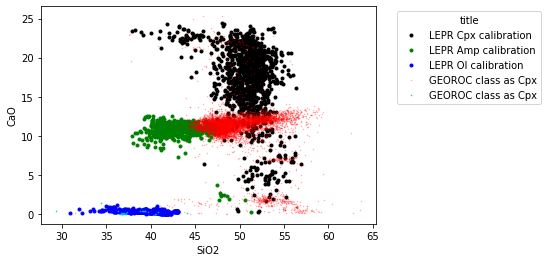

In [53]:

plt.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['SiO2'], LEPR_Ol_nosuf['CaO'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['SiO2'], Amp_Classified_Px['CaO'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.3)
plt.plot(Amp_Classified_Ol['SiO2'], Amp_Classified_Ol['CaO'], '.c', label='GEOROC class as Cpx', ms=1, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('SiO2')
plt.ylabel('CaO')

Text(0, 0.5, 'CaO')

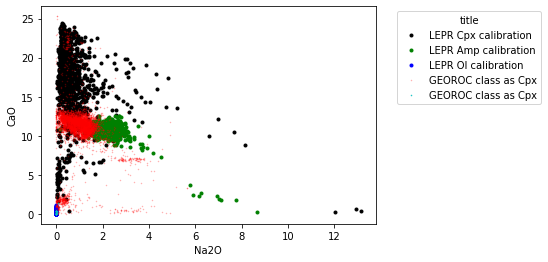

In [54]:

plt.plot(LEPR_Cpx_nosuf['Na2O'], LEPR_Cpx_nosuf['CaO'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['Na2O'], LEPR_Amp_nosuf['CaO'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['Na2O'], LEPR_Ol_nosuf['CaO'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['Na2O'], Amp_Classified_Px['CaO'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.3)
plt.plot(Amp_Classified_Ol['Na2O'], Amp_Classified_Ol['CaO'], '.c', label='GEOROC class as Cpx', ms=1, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Na2O')
plt.ylabel('CaO')

Text(0, 0.5, 'SiO2')

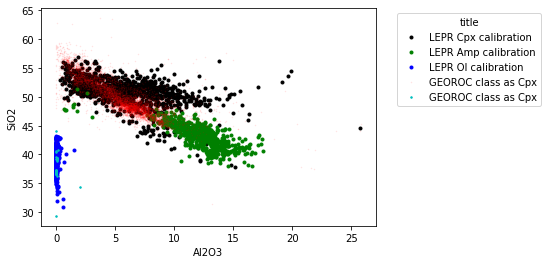

In [60]:

plt.plot(LEPR_Cpx_nosuf['Al2O3'], LEPR_Cpx_nosuf['SiO2'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['Al2O3'], LEPR_Amp_nosuf['SiO2'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['Al2O3'], LEPR_Ol_nosuf['SiO2'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['Al2O3'], Amp_Classified_Px['SiO2'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['Al2O3'], Amp_Classified_Ol['SiO2'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Al2O3')
plt.ylabel('SiO2')

(0.0, 2.0)

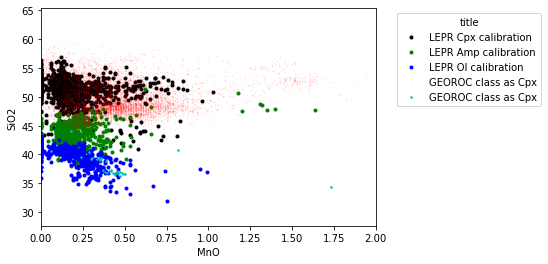

In [67]:

plt.plot(LEPR_Cpx_nosuf['MnO'], LEPR_Cpx_nosuf['SiO2'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['MnO'], LEPR_Amp_nosuf['SiO2'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['MnO'], LEPR_Ol_nosuf['SiO2'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['MnO'], Amp_Classified_Px['SiO2'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['MnO'], Amp_Classified_Ol['SiO2'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('MnO')
plt.ylabel('SiO2')
plt.xlim([0, 2])

(0.0, 3.0)

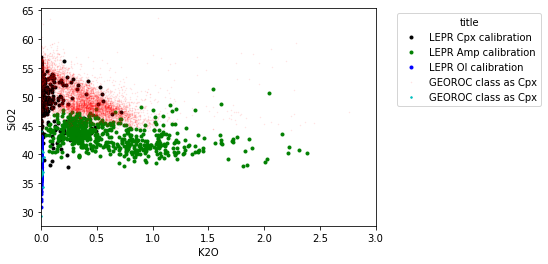

In [70]:

plt.plot(LEPR_Cpx_nosuf['K2O'], LEPR_Cpx_nosuf['SiO2'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['K2O'], LEPR_Amp_nosuf['SiO2'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['K2O'], LEPR_Ol_nosuf['SiO2'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['K2O'], Amp_Classified_Px['SiO2'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['K2O'], Amp_Classified_Ol['SiO2'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('K2O')
plt.ylabel('SiO2')
plt.xlim([0, 3])

(-0.1, 1.0)

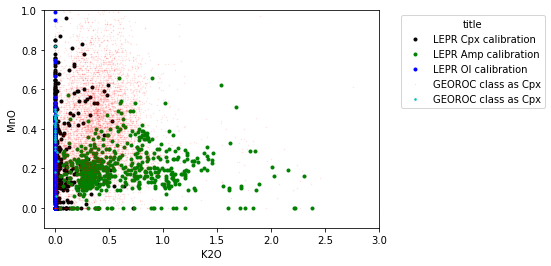

In [74]:

plt.plot(LEPR_Cpx_nosuf['K2O'], LEPR_Cpx_nosuf['MnO'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['K2O'], LEPR_Amp_nosuf['MnO'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['K2O'], LEPR_Ol_nosuf['MnO'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['K2O'], Amp_Classified_Px['MnO'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['K2O'], Amp_Classified_Ol['MnO'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('K2O')
plt.ylabel('MnO')
plt.xlim([-0.1, 3])
plt.ylim([-0.1, 1])

Text(0, 0.5, 'CaO')

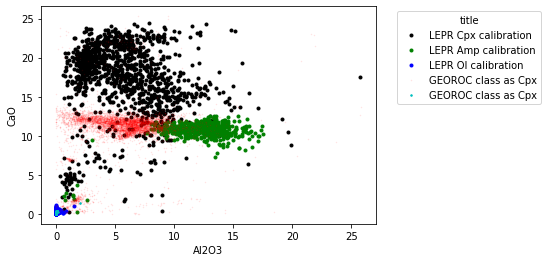

In [65]:

plt.plot(LEPR_Cpx_nosuf['Al2O3'], LEPR_Cpx_nosuf['CaO'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['Al2O3'], LEPR_Amp_nosuf['CaO'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['Al2O3'], LEPR_Ol_nosuf['CaO'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['Al2O3'], Amp_Classified_Px['CaO'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['Al2O3'], Amp_Classified_Ol['CaO'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Al2O3')
plt.ylabel('CaO')

Text(0, 0.5, 'FeOt')

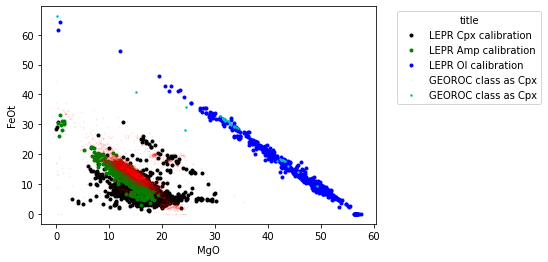

In [62]:

plt.plot(LEPR_Cpx_nosuf['MgO'], LEPR_Cpx_nosuf['FeOt'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['MgO'], LEPR_Amp_nosuf['FeOt'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['MgO'], LEPR_Ol_nosuf['FeOt'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['MgO'], Amp_Classified_Px['FeOt'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['MgO'], Amp_Classified_Ol['FeOt'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('MgO')
plt.ylabel('FeOt')

(0.0, 40.0)

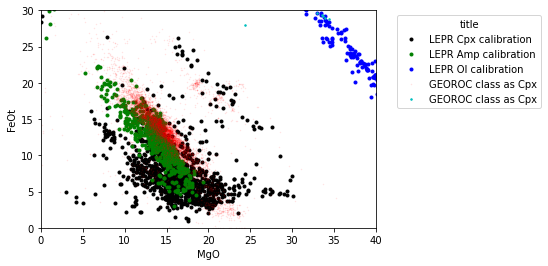

In [64]:

plt.plot(LEPR_Cpx_nosuf['MgO'], LEPR_Cpx_nosuf['FeOt'], '.k', alpha=1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['MgO'], LEPR_Amp_nosuf['FeOt'], '.g', alpha=1, label='LEPR Amp calibration')
plt.plot(LEPR_Ol_nosuf['MgO'], LEPR_Ol_nosuf['FeOt'], '.b', alpha=1, label='LEPR Ol calibration')

plt.plot(Amp_Classified_Px['MgO'], Amp_Classified_Px['FeOt'], '.r', label='GEOROC class as Cpx', ms=1, alpha=0.1)
plt.plot(Amp_Classified_Ol['MgO'], Amp_Classified_Ol['FeOt'], '.c', label='GEOROC class as Cpx', ms=3, alpha=1)

plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('MgO')
plt.ylabel('FeOt')
plt.ylim([0, 30])
plt.xlim([0, 40])

## Some of the worst Offenders - Dawson 1977- 7 or 8 with 55 wt% SiO2
# IMAOKA T. (2014) 0 -AR GEOCHRONOLOGY OF MIDDLE MIOCENE SUBMARINE VOLCANO-PLUTONIC COMPLEX IN SOUTHWEST JAPAN
#- asked on researchgate

# GIONCADA A. (2014) 0 doi: 10.1016/j.lithos.2013.10.023
- seems legit, as have 4 wt% Mn, 8 wt% K2O, no TiO2

#[18188] VARTIAINEN H. (1980)
#[18200] DOROSHKEVICH A. G. (2007) - doi: 10.1007/s00710-006-0165-10
- Says amphiboles.... Assume had thin sections

# [18232] ASHCHEPKOV I. V. (2010) - couldnt see mention of amphiboles
#[18281] SECHER K. (1980)
# JAQUES A. L. (1986)
#SAVELYEVA V. B. (2016)
# TANG GONG-JIAN (2017)
# [21440] GE MAO-HUI (2017)
# [21472] HE XIAO-FANG (2017)
# [21479] CHEN QIONG (2017)
# [21509] HAMDY M. M. (2017)
# [21633] RAJESH H. M. (2018)
# [22461] REZEAU H. (2018)


# Plot on Amphbole site space.. Maybe soething there...

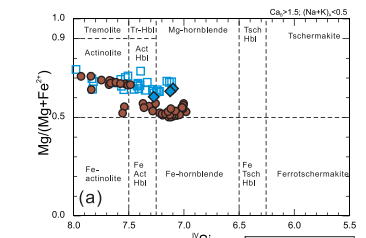

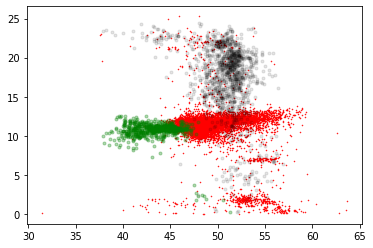

In [24]:

plt.plot(Amp_Classified_Px['SiO2'], Amp_Classified_Px['CaO'], '.r', label='Misclassifed GEOROC', ms=1)
plt.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.k', alpha=0.1, label='LEPR Cpx calibration')
plt.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.g', alpha=0.3, label='LEPR Amp calibration')

#plt.legend()

## Is it anything to do with totals?

In [25]:
GEOROC_Amp_suffix=GEOROC_Amp.add_suffix('_Amp')


In [26]:

GEOROC_Amp_suffix_reset=GEOROC_Amp_suffix.reset_index(drop=True)
GEOROC_Amp_suffix_reset_cpx=GEOROC_Amp_suffix_reset.copy()
GEOROC_Amp_suffix_reset_cpx.columns = [col.replace('_Amp', '_Cpx') for col in GEOROC_Amp_suffix_reset_cpx.columns]
GEOROC_Amp_suffix_reset_cpx

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,P2O5_Cpx
0,41.400,2.860,14.800,12.130,0.160,13.790,10.900,3.050,0.810,0.000,0.080
1,45.700,0.650,8.710,3.790,0.050,19.700,12.500,3.540,0.570,1.570,0.000
2,43.000,3.170,12.400,5.220,0.080,16.600,11.800,3.130,0.870,1.700,0.000
3,42.000,4.880,11.600,5.450,0.050,15.800,12.000,3.120,0.870,1.680,0.000
4,36.600,0.020,22.800,6.250,0.040,21.400,0.540,4.920,1.670,0.010,0.000
...,...,...,...,...,...,...,...,...,...,...,...
40036,47.240,1.110,7.430,16.860,0.580,10.580,11.370,1.090,0.480,0.000,0.000
40037,48.850,1.161,6.236,12.359,0.405,14.306,11.930,0.938,0.385,0.024,0.005
40038,48.094,0.879,7.019,13.154,0.441,13.741,12.132,1.068,0.465,0.038,0.000
40039,48.711,0.886,6.534,13.339,0.462,13.723,12.161,1.027,0.428,0.035,0.022


In [30]:
GEOROC_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=GEOROC_Amp_suffix_reset).cation_sum_All
print('done amp')
#LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]
GEOROC_Amp_cpx_sums=pt.calculate_clinopyroxene_components(cpx_comps=GEOROC_Amp_suffix_reset_cpx).Cation_Sum_Cpx
#LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]
print('done cpx')

done amp
made it to for loop
done cpx


In [31]:
Amp['Amp_Sums']=GEOROC_Amp_Sums
Amp['Cpx_Sums']=GEOROC_Amp_cpx_sums

(array([1.000e+00, 1.000e+00, 2.700e+01, 5.700e+01, 1.730e+03, 6.033e+03,
        1.800e+02, 7.200e+01, 1.000e+00, 5.000e+00]),
 array([13.47305164, 13.8204489 , 14.16784617, 14.51524343, 14.8626407 ,
        15.21003796, 15.55743523, 15.90483249, 16.25222976, 16.59962702,
        16.94702429]),
 <BarContainer object of 10 artists>)

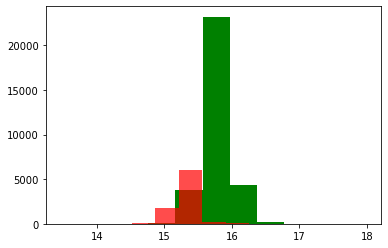

In [32]:
plt.hist(Amp.loc[Amp['Phase_Min_Group_ML']=="Amp", "Amp_Sums" ], color='green')
plt.hist(Amp.loc[Amp['Phase_Min_Group_ML']=="Px", "Amp_Sums" ], alpha=0.7, color='red')

(array([1.000e+00, 1.000e+00, 2.700e+01, 5.700e+01, 1.730e+03, 6.033e+03,
        1.800e+02, 7.200e+01, 1.000e+00, 5.000e+00]),
 array([3.51470912, 3.6053345 , 3.69595987, 3.78658524, 3.87721062,
        3.96783599, 4.05846136, 4.14908674, 4.23971211, 4.33033748,
        4.42096286]),
 <BarContainer object of 10 artists>)

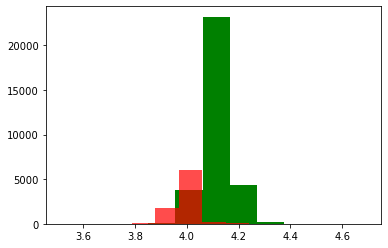

In [33]:
plt.hist(Amp.loc[Amp['Phase_Min_Group_ML']=="Amp", "Cpx_Sums" ], color='green')
plt.hist(Amp.loc[Amp['Phase_Min_Group_ML']=="Px", "Cpx_Sums" ], alpha=0.7, color='red')

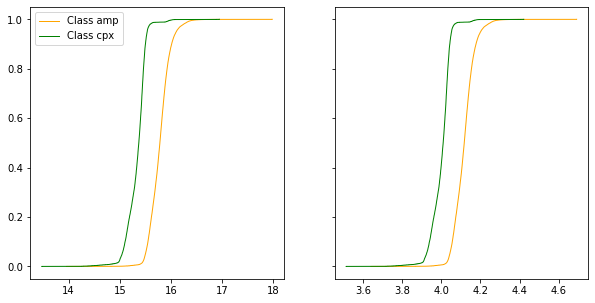

In [37]:
Amp_sort_asum=np.sort(Amp.loc[Amp['Phase_Min_Group_ML']=="Amp", "Amp_Sums" ])
Amp_sort_csum=np.sort(Amp.loc[Amp['Phase_Min_Group_ML']=="Amp", "Cpx_Sums" ])
Cpx_sort_asum=np.sort(Amp.loc[Amp['Phase_Min_Group_ML']=="Px", "Amp_Sums" ])
Cpx_sort_csum=np.sort(Amp.loc[Amp['Phase_Min_Group_ML']=="Px", "Cpx_Sums" ])
b=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.step(np.concatenate([Amp_sort_asum, Amp_sort_asum[[-1]]]),
         np.arange(Amp_sort_asum.size+1)/Amp_sort_asum.size, color='orange', linewidth=b, label='Class amp')
ax1.step(np.concatenate([Cpx_sort_asum, Cpx_sort_asum[[-1]]]),
         np.arange(Cpx_sort_asum.size+1)/Cpx_sort_asum.size, color='green', linewidth=b, label='Class cpx')

ax1.legend()
ax2.step(np.concatenate([Amp_sort_csum, Amp_sort_csum[[-1]]]),
         np.arange(Amp_sort_csum.size+1)/Amp_sort_csum.size, color='orange', linewidth=b)
ax2.step(np.concatenate([Cpx_sort_csum, Cpx_sort_csum[[-1]]]),
         np.arange(Cpx_sort_csum.size+1)/Cpx_sort_csum.size, color='green', linewidth=b, label='Class cpx')


In [ ]:
# Want to know if amphibole and cpx are actually different in terms of their sums...

In [ ]:
LEPR_Cpx_sums_sort=np.sort(LEPR_Cpx_Sums)
plt.step(np.concatenate([Amp_sort_csum, Amp_sort_csum[[-1]]]),
         np.arange(Amp_sort_csum.size+1)/Amp_sort_csum.size, color='orange', linewidth=b)
plt.step(np.concatenate([Cpx_sort_csum, Cpx_sort_csum[[-1]]]),
         np.arange(Cpx_sort_csum.size+1)/Cpx_sort_csum.size, color='green', linewidth=b, label='Class cpx')
plt.step(np.concatenate([Cpx_sort_csum, Cpx_sort_csum[[-1]]]),
         np.arange(Cpx_sort_csum.size+1)/Cpx_sort_csum.size, color='green', linewidth=b, label='Class cpx')


(14.0, 16.0)

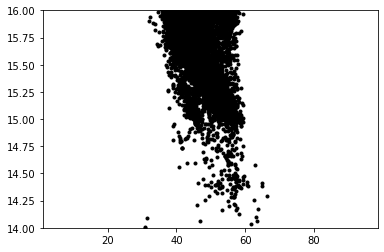

In [39]:
plt.plot(Amp['SiO2'], Amp['Amp_Sums'], '.k')
plt.ylim([14, 16])

In [40]:
Amp.loc[Amp['Phase_Min_Group_ML']=="Px", "LEPR_Amp_Sums" ]

KeyError: 'LEPR_Amp_Sums'